In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
font = {'family':'serif', 'weight':'normal', 'size':16}
fontTitle = {'family':'serif', 'weight':'normal', 'size':20}

Text(0.5, 1.0, 'Signal baseband frequency')

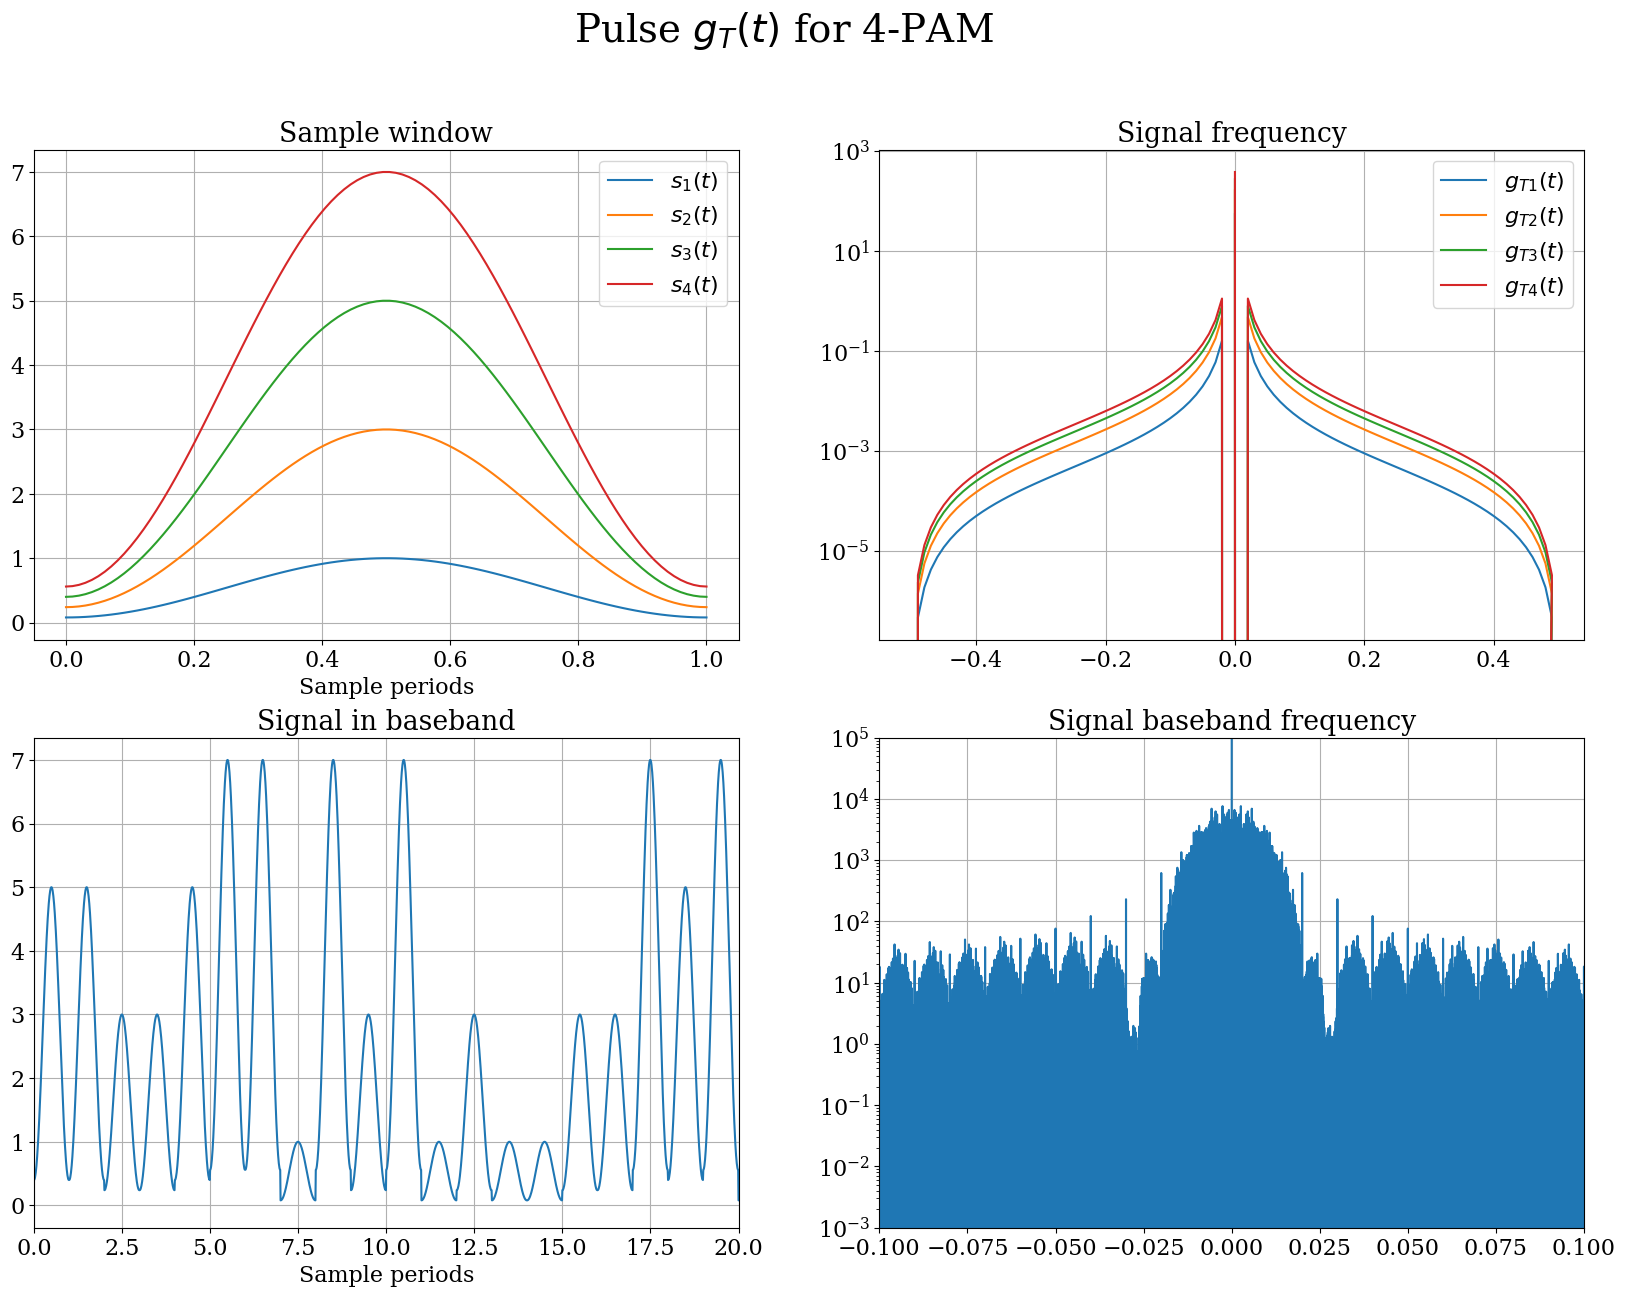

In [51]:
PtsNum = 1000 # Number of points
M = 100 # Upsample by M
Constl = [1,3,5,7] # 4PAM Constellation

hamSig = np.hamming(M)

figure, ax = plt.subplots(2,2,figsize=(20,14))
figure.suptitle(r'Pulse $g_T(t)$ for 4-PAM',fontsize=28)

plt.rc('font',**font)

ax[0][0].grid(True)
ax[0][0].plot(np.linspace(0,int(len(hamSig)/M),len(hamSig)),Constl[0]*hamSig, label=r'$s_1(t)$')
ax[0][0].plot(np.linspace(0,int(len(hamSig)/M),len(hamSig)),Constl[1]*hamSig, label=r'$s_2(t)$')
ax[0][0].plot(np.linspace(0,int(len(hamSig)/M),len(hamSig)),Constl[2]*hamSig, label=r'$s_3(t)$')
ax[0][0].plot(np.linspace(0,int(len(hamSig)/M),len(hamSig)),Constl[3]*hamSig, label=r'$s_4(t)$')
ax[0][0].set_xlabel('Sample periods')
ax[0][0].legend()
ax[0][0].set_title('Sample window')

[H1,w1] = [np.fft.fft(Constl[0]*hamSig),np.fft.fftfreq(len(hamSig))]
[H2,w2] = [np.fft.fft(Constl[1]*hamSig),np.fft.fftfreq(len(hamSig))]
[H3,w3] = [np.fft.fft(Constl[2]*hamSig),np.fft.fftfreq(len(hamSig))]
[H4,w4] = [np.fft.fft(Constl[3]*hamSig),np.fft.fftfreq(len(hamSig))]
ax[0][1].grid(True)
ax[0][1].plot(w1,H1, label=r'$g_{T1}(t)$')
ax[0][1].plot(w2,H2, label=r'$g_{T2}(t)$')
ax[0][1].plot(w3,H3, label=r'$g_{T3}(t)$')
ax[0][1].plot(w4,H4, label=r'$g_{T4}(t)$')
ax[0][1].set_yscale('log')
ax[0][1].legend()
ax[0][1].set_title('Signal frequency')

sig = np.zeros(PtsNum*M)
sig[::M] = np.random.choice(Constl,int(PtsNum))
BaseSig = np.convolve(hamSig,sig)

[Hb,wb] = [np.fft.fft(BaseSig),np.fft.fftfreq(len(BaseSig))]

ax[1][0].grid(True)
ax[1][0].plot(np.arange(len(BaseSig))/M, BaseSig)
ax[1][0].set_xlim(0,20)
ax[1][0].set_title('Signal in baseband')
ax[1][0].set_xlabel('Sample periods')

ax[1][1].grid(True)
ax[1][1].plot(wb,Hb)
ax[1][1].set_yscale('log')
ax[1][1].set_ylim(1e-3,1e5)
ax[1][1].set_xlim(-0.1,0.1)
ax[1][1].set_title('Signal baseband frequency')

Text(0.5, 1.0, 'Signal baseband frequency')

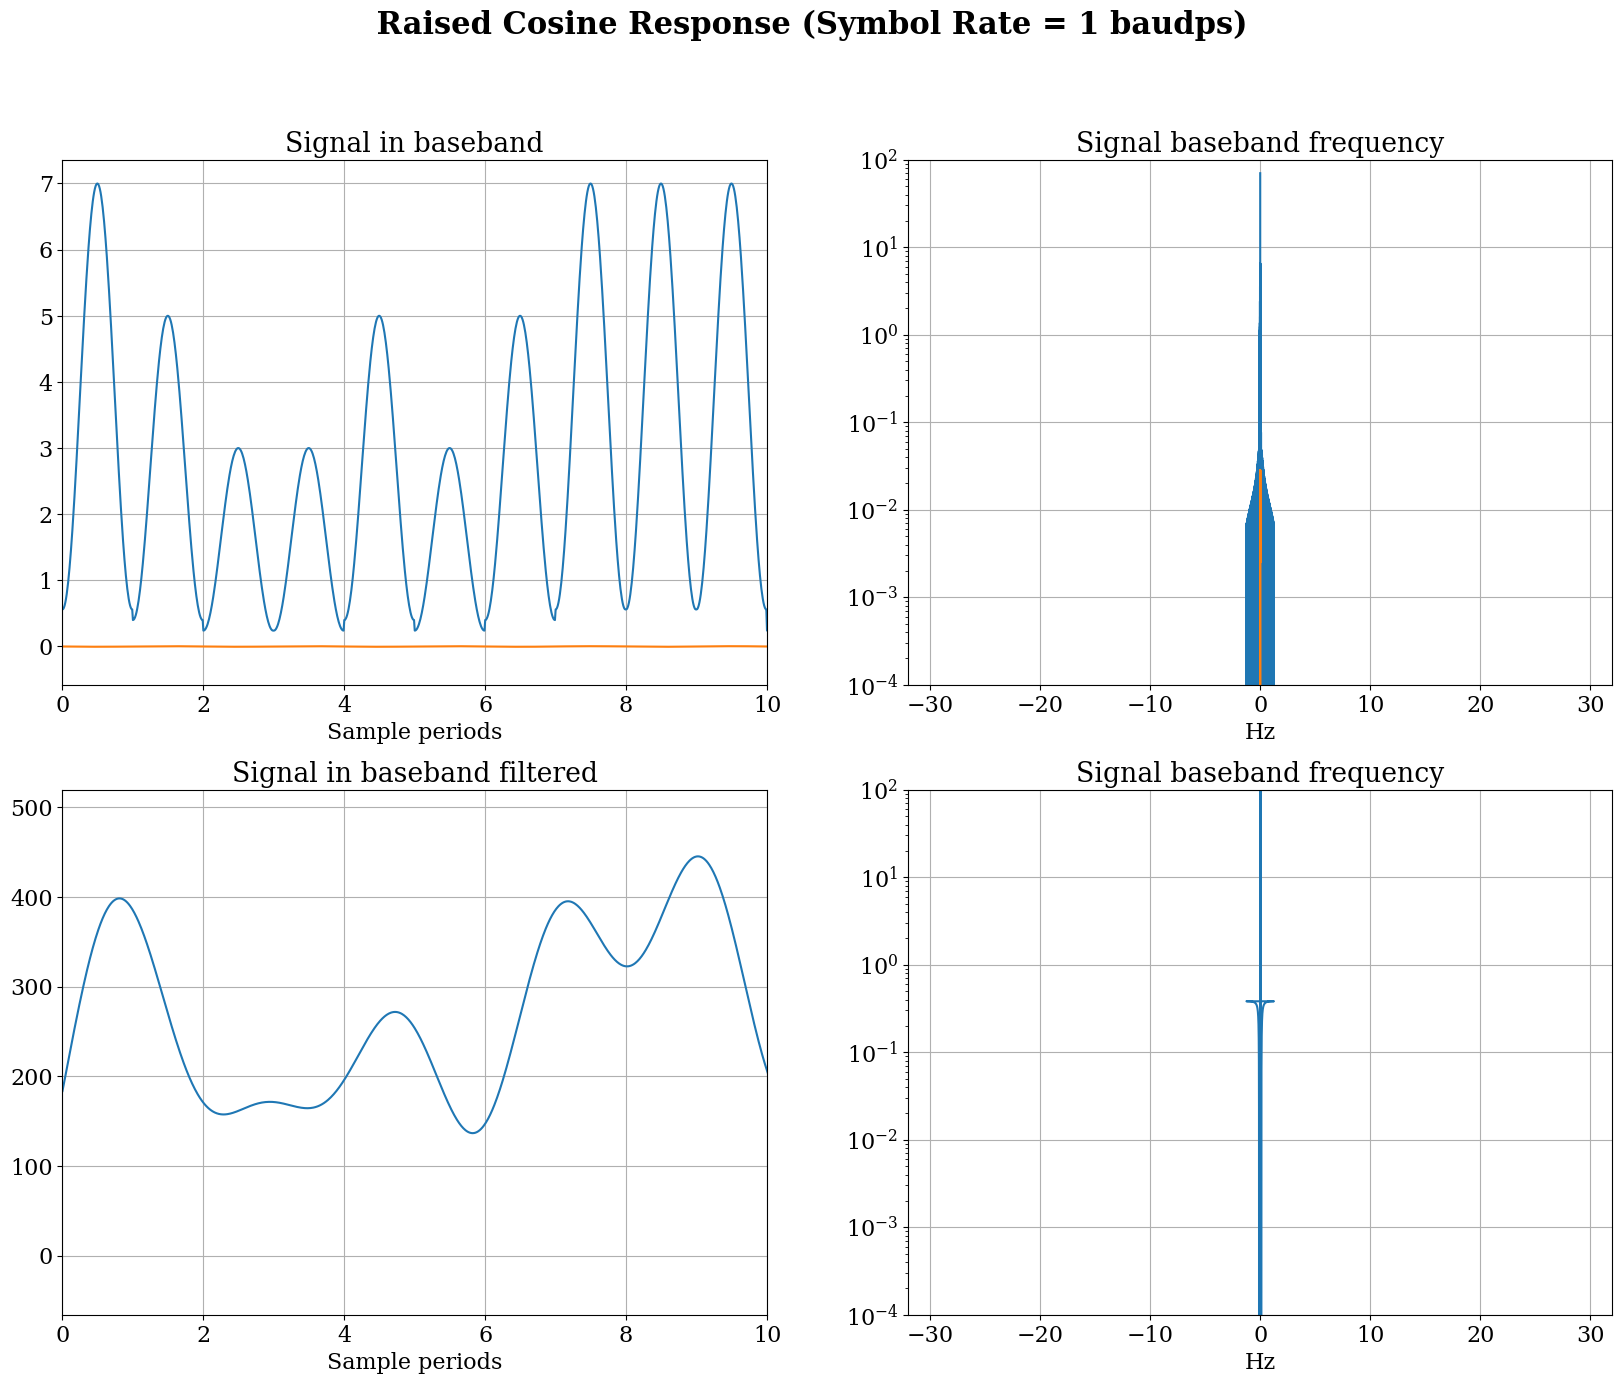

In [244]:
PtsNum = 200 # Number of points
M = 100 # Upsample by M
FFTfac = 32 # FFT points factor
sincP = 40 # Sinc periods

SymbRate = 1 # Symbol rate
Constl = [1,3,5,7] # 4PAM Constellation

hamSig = np.hamming(M)

sig = np.zeros(PtsNum*M)
sig[::M] = np.random.choice(Constl,int(PtsNum))
BaseSig = np.convolve(hamSig,sig)

figure, ax = plt.subplots(2,2,figsize=(20,15))
plt.rc('font',**font)
figure.suptitle(f' Raised Cosine Response (Symbol Rate = {SymbRate} baudps) ',fontsize=22, weight='bold')

tArray = np.linspace(-2*sincP,2*sincP,M*sincP*4*SymbRate+1)

# beta = 10 # Rolloff factor
# f0 = SymbRate/2 # 6dB Bandwidth (Hz)
# fd = f0*beta
# f1 = f0-fd # Non-Atttenuation Bandwidth (Hz)
# hRC =  (np.sin(2*np.pi*f0*tArray)/(2*np.pi*f0*tArray)) * (np.cos(2*np.pi*fd*tArray)/(1-(4*fd*tArray)**2))

hRC = np.sinc(tArray)
H = np.fft.fft(a=hRC, n=FFTfac*PtsNum) / PtsNum
w = np.fft.fftfreq(len(H), d = tArray[-1]/PtsNum)

hRC2 = np.zeros(len(BaseSig))
hRC2[:M*sincP*4*SymbRate+1] = hRC


ax[0][0].grid(True)
ax[0][0].plot(np.arange(len(BaseSig))/M, BaseSig)
ax[0][0].plot(np.arange(len(BaseSig))/M, hRC2)
ax[0][0].set_xlim(0,10)
ax[0][0].set_title('Signal in baseband')
ax[0][0].set_xlabel('Sample periods')

Hb = np.fft.fft(a=BaseSig, n=FFTfac*PtsNum) / PtsNum 
wb = np.fft.fftfreq(len(Hb), d = tArray[-1]/PtsNum)

ax[0][1].grid(True)
ax[0][1].plot(wb,Hb)
ax[0][1].set_yscale('log')
ax[0][1].set_ylim(1e-4,1e2)
ax[0][1].set_xlim(-SymbRate*32,SymbRate*32)
ax[0][1].set_title('Signal baseband frequency')
ax[0][1].set_xlabel('Hz')
ax[0][1].plot(w,H, label='Beta = ' + str(beta))

FilterSig = np.convolve(BaseSig,hRC,mode='same')
# FilterSig = FilterSig[M*PtsNum:]

ax[1][0].grid(True)
ax[1][0].plot(np.arange(len(FilterSig))/M, FilterSig)
ax[1][0].set_xlim(0,10)
ax[1][0].set_title('Signal in baseband filtered')
ax[1][0].set_xlabel('Sample periods')

Hb = np.fft.fft(a=FilterSig, n=FFTfac*PtsNum) / PtsNum
wb = np.fft.fftfreq(len(Hb), d = tArray[-1]/PtsNum)

ax[1][1].grid(True)
ax[1][1].plot(wb,Hb)
ax[1][1].set_yscale('log')
ax[1][1].set_ylim(1e-4,1e2)
ax[1][1].set_xlim(-SymbRate*32,SymbRate*32)
ax[1][1].set_xlabel('Hz')
ax[1][1].set_title('Signal baseband frequency')

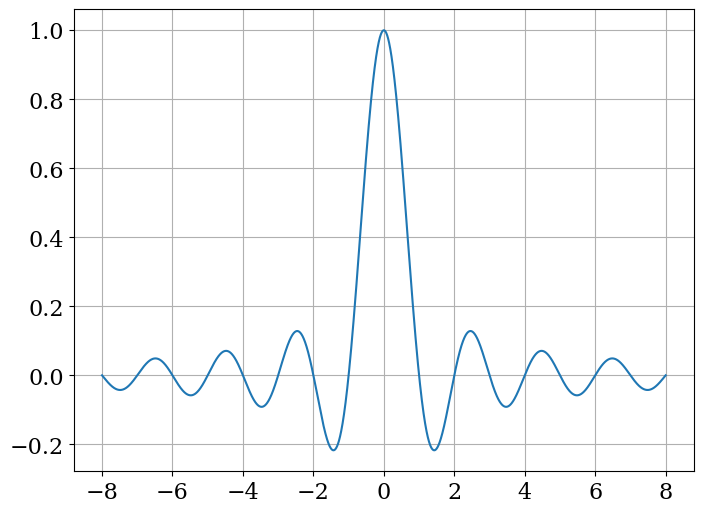

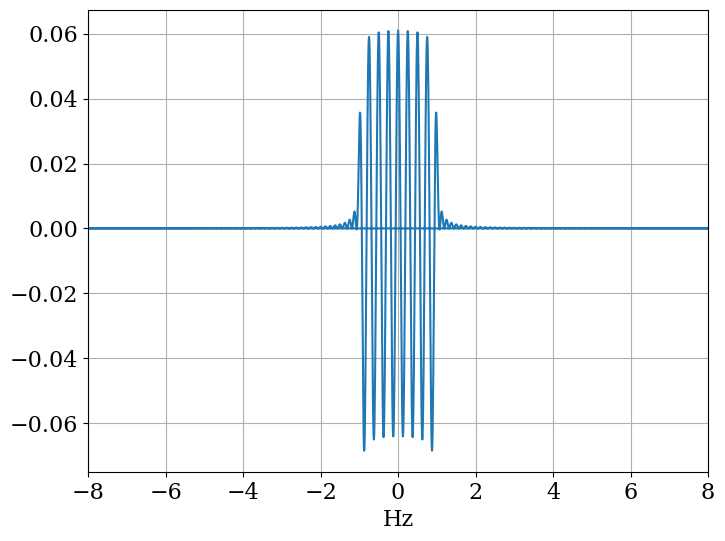

In [153]:
Npts = 10000
TimeArray = np.linspace(-8,8,Npts)
freqer = 4

signalX = np.sinc(TimeArray)
HX = np.fft.fft(a=signalX, n=16*Npts) / Npts
wX = np.fft.fftfreq(len(HX),d=TimeArray[-1]/Npts)

plt.figure(figsize=(8,6))
plt.plot(TimeArray,signalX)
# plt.xlim(0,TimeArray[-1]/freqer)
plt.grid()

plt.figure(figsize=(8,6))
plt.plot(wX,HX)
plt.xlim(-2*freqer,2*freqer)
plt.xlabel('Hz')
plt.grid()